In [ ]:
!pip install fitter
!pip install distfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas
import seaborn as sns
import scipy.stats as sc
import numpy as np
import pylab 
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.optimize import differential_evolution, minimize

In [ ]:
n = 200  
alpha = 0.05

In [ ]:
data = np.genfromtxt('ftp://sebulbaass.ml/data_32.csv', delimiter=',')
data

array([2., 3., 2., 1., 0., 2., 3., 2., 4., 4., 3., 3., 3., 2., 1., 1., 1.,
       1., 3., 3., 0., 4., 2., 2., 1., 3., 1., 2., 1., 3., 0., 2., 5., 2.,
       2., 3., 2., 2., 2., 4., 1., 6., 1., 2., 2., 3., 5., 1., 5., 4., 0.,
       5., 2., 3., 2., 3., 6., 3., 3., 4., 3., 4., 2., 3., 3., 2., 1., 3.,
       2., 3., 4., 4., 1., 2., 3., 2., 2., 4., 2., 6., 1., 2., 4., 4., 2.,
       2., 4., 5., 1., 2., 4., 2., 3., 0., 2., 1., 2., 2., 3., 3., 1., 4.,
       0., 1., 1., 2., 1., 1., 3., 2., 3., 0., 3., 0., 2., 2., 0., 2., 2.,
       3., 2., 2., 2., 2., 2., 4., 4., 2., 4., 1., 3., 2., 4., 4., 0., 0.,
       2., 2., 2., 3., 1., 4., 0., 3., 4., 2., 1., 2., 2., 4., 1., 5., 5.,
       3., 1., 3., 0., 3., 2., 3., 4., 2., 2., 1., 0., 1., 1., 5., 6., 1.,
       3., 0., 1., 4., 2., 1., 4., 1., 1., 1., 3., 3., 3., 2., 5., 3., 2.,
       2., 0., 2., 2., 4., 4., 3., 1., 2., 2., 2., 4., 4.])

Для наглядности тупо нарисуем график распределения с kde

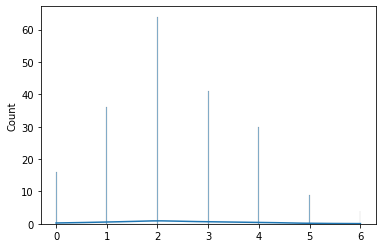

In [ ]:
sns.histplot(x=data, bins=len(data)*2, kde=True)

Визуально видим нормальное распределение чуть скошенное влево, а это нам гворит о том, что медиана и мода меньше среднего. 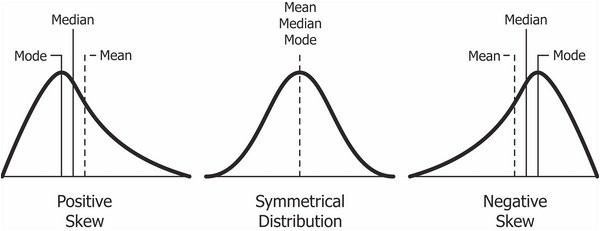

# Задание 1

Используем достаточно обычный метод, посмотрим какие вообще распределения будут близки к нашим данным

Fitting 106 distributions:  94%|█████████▍| 100/106 [01:00<00:17,  2.88s/it]/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
Fitting 106 distributions: 100%|██████████| 106/106 [01:15<00:00,  1.41it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,44.265598,553.479634,-285.726958,inf,0.299973,1.860752e-16
rdist,51.860635,inf,-254.056518,inf,0.471680,2.367200e-41
laplace_asymmetric,53.735494,448.897104,-246.953771,inf,0.172757,1.088674e-05
laplace,53.803601,468.736048,-251.998759,inf,0.240000,1.269097e-10
loglaplace,53.835431,464.471350,-246.582158,inf,0.240000,1.269097e-10


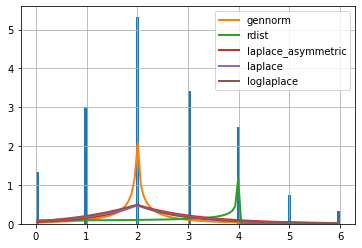

In [ ]:
f = Fitter(data)
f.fit()
f.summary()

Как видим, данные не вариативны и прям определённо точно подходят к дискретному распределению, которого в данной библиотеке нет, ну и вообще его мало кто использует, потому что его сгенерировать можно довольно просто, используя ниже приведённый код, который не имеет никаких отдельных функций дискретного распределения, собственно почему я и облажался не найдя его нигде в документациях:
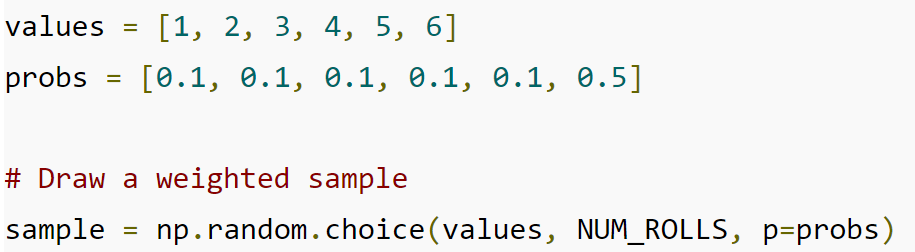 

Итак, давайте узнаем какое распределение лучше подходит к нашим данным, то есть наименее отклоняющееся по сумме квадратных отклонений: sumsquare_error

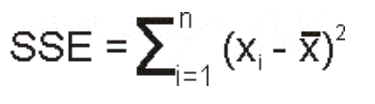

In [ ]:
f.get_best(method = 'sumsquare_error')

{'gennorm': {'beta': 0.35757330208639526,
  'loc': 1.9999999999999996,
  'scale': 0.025017987773682443}}

Видим наши параметры распределения, попробуем сгенерировать по ним выборку, посмотрим, что выйдет

(0.0, 10.0)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


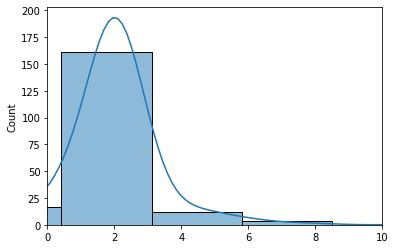

In [ ]:
x = sc.gennorm.rvs(0.35757330208639526, loc=1.9999999999999996, scale=0.025017987773682443, size=n)

sns.histplot(x, bins=10, kde=True).set_xlim(0, 10)

In [ ]:
f.fitted_param["gennorm"]

(0.35757330208639526, 1.9999999999999996, 0.025017987773682443)

Всё не очень красиво и не очень то, что нам нужно, начертим квантиль графики распределений из распределений выше, ну и нормальное тоже начертим

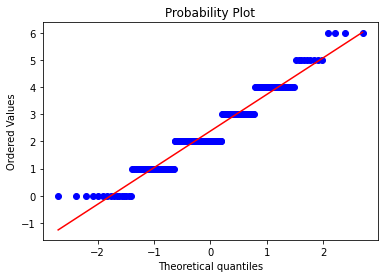

In [ ]:
sc.probplot(data, dist="norm", plot=pylab)
pylab.show()

Видим, что данные наши это просто очень невариативныая категориальная величина, её график распределения будет выглядеть, как обычный график barchart по категориям

Сделаем тест на нормальность и тест колмогорова-смирнова

In [ ]:
k2, p = sc.normaltest(data)

print("p = {:g}".format(p))

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.123899
The null hypothesis cannot be rejected


Тест на нормальность пройден

In [ ]:
D, p = sc.kstest(data, 'norm')

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


Этому тесту нельзя доверять, так как на нужно знать реальные мю и сигма, попробуем найти их по методу правдоподобия

In [ ]:
def get_norm_evals(m, syg, size):
  norm = np.random.normal(m, syg, size)

  def norm_likelihood(vars):
    return -np.sum([sc.norm.logpdf(x, vars[0], vars[1]) for x in norm])

  init_guess = [0, 1]
  log_result = minimize(norm_likelihood, init_guess, bounds=[(-np.inf, np.inf), (0, np.inf)])

  print(f'Estimate expected value: {log_result.x[0]}', f'Estimate sygma: {log_result.x[1]}', sep='\n')
  print(f'Expected value deviation: {abs(log_result.x[0] - m)}',
      f'Sygma deviation: {abs(log_result.x[1] - syg)}', sep='\n')

In [ ]:
get_norm_evals(data.mean(), data.std(), 10)

Estimate expected value: 2.440294875608714
Estimate sygma: 1.2724287785312764
Expected value deviation: 0.06029487560871427
Sygma deviation: 0.10074273297047331


In [ ]:
get_norm_evals(data.mean(), data.std(), 100)

Estimate expected value: 2.034867356259283
Estimate sygma: 1.4933618573162875
Expected value deviation: 0.3451326437407167
Sygma deviation: 0.12019034581453769


In [ ]:
get_norm_evals(data.mean(), data.std(), 1000)

Estimate expected value: 2.3944900357705836
Estimate sygma: 1.3771354011641925
Expected value deviation: 0.01449003577058372
Sygma deviation: 0.0039638896624427655


In [ ]:
mu = 2.374235863623547
sigma = 1.396610490490404

num_tests = 10**5
num_rejects = 0
for i in range(num_tests):
    normed_data = (data - mu) / sigma    # this is okay
    D, pval = sc.kstest(normed_data, 'norm')
    if pval < alpha:
        num_rejects += 1
ratio = float(num_rejects) / num_tests
print('{}/{} = {:.2f} rejects at rejection level {}'.format(
    num_rejects, num_tests, ratio, alpha))

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


100000/100000 = 1.00 rejects at rejection level 0.05


Тест не пройден, как и ожидалось, в принципе, если смотреть на хистограмму, то график немного скошен

Зададим квантиль-квантиль график дискретного распределения на уникальных значениях из датасета и сравним его с нашим распределением

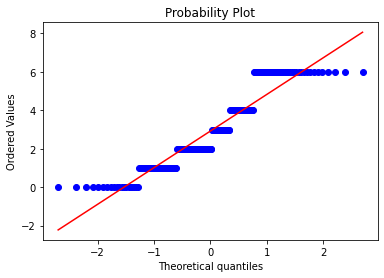

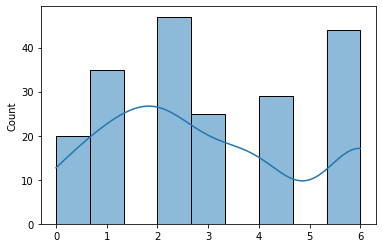

In [ ]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
myRV = sc.rv_discrete(name="Discrete", values=(xk, pk))
x = myRV.rvs(size=n)

sc.probplot(x, dist="norm", plot=pylab)
pylab.show()
sns.histplot(x, kde=True)

Итак, собственно видим наиболее подходящее распределение, да гистограма довольно отличается, так как я задал случайные веса для генерации распределения. Но в целом мы видим такой же паттерн на квантиль-квантиль графике

Зададим какое-нибудь генеральное нормальное распрделение

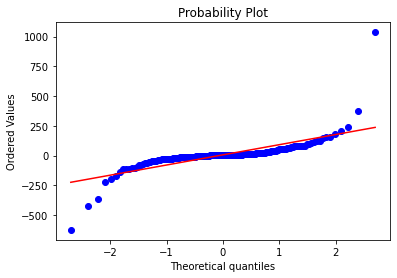

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


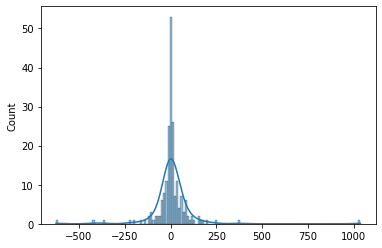

In [ ]:
x = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

sc.probplot(x, dist="norm", plot=pylab)
pylab.show()
sns.histplot(x, kde=True)

Видим, почему наши данные так отличаются от генерального нормального распределения, но также можем заметить как мохожи графики плотности, если брать интервал от 0 до 5, плюс квантиль-квантиль график довольно плоский в тех моментах, где плоский квантиль-квантиль график нашей функции

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose inte

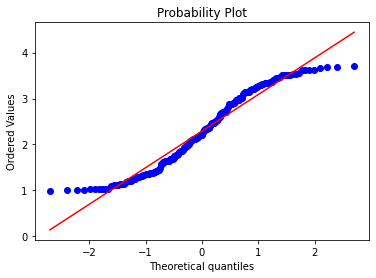

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may

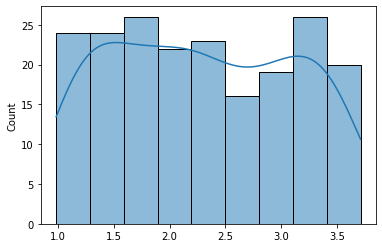

In [ ]:
x = sc.rdist.rvs(c=2, loc=mu, scale=sigma, size=n)

sc.probplot(x, dist="norm", plot=pylab)
pylab.show()
sns.histplot(x, kde=True)

Здесь вырисовывается что-то более менее похожее на наши данные, хотя очень далеко от них

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose inte

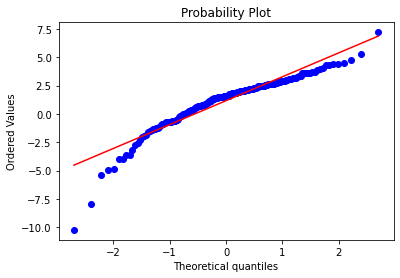

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may

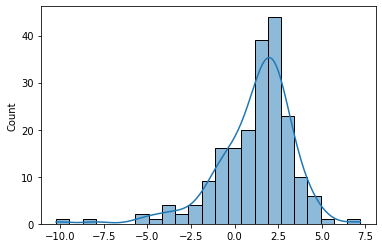

In [ ]:
x = sc.laplace_asymmetric.rvs(kappa=1.5, loc=mu, scale=sigma, size=n)

sc.probplot(x, dist="norm", plot=pylab)
pylab.show()
sns.histplot(x, kde=True)

Мы не видим здесь никаких плоских моментов в квантиль-квантиль графике, который бы характеризовал категориальные данные

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


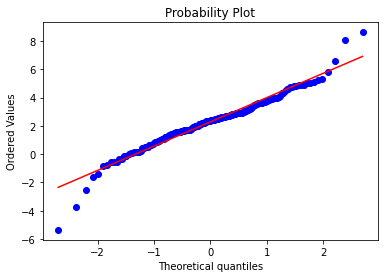

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may

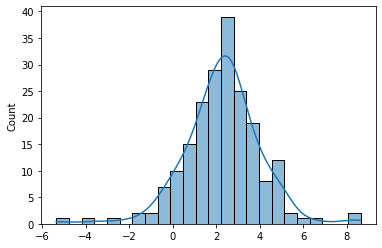

In [ ]:
x = sc.laplace.rvs(loc=mu, scale=sigma, size=n)

sc.probplot(x, dist="norm", plot=pylab)
pylab.show()
sns.histplot(x, kde=True)

Здесь вообще распределение очень нормальное

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose inte

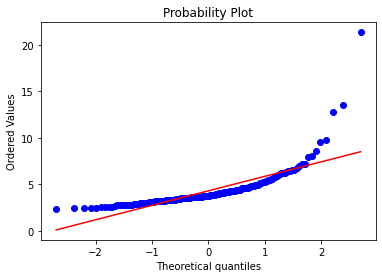

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may

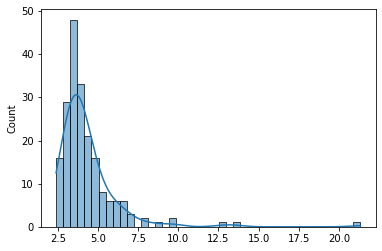

In [ ]:
x = sc.loglaplace.rvs(c=1.5, loc=mu, scale=sigma, size=n)

sc.probplot(x, dist="norm", plot=pylab)
pylab.show()
sns.histplot(x, kde=True)

## Вывод

Самым похожим по квантиль квантиль графику и функции плостности оказалось дискретное распределение. Да я балбес, не нашёл его сразу, и про категориальность, это вообще понятие из Анализа данных, которое обозначает, что данные грубо говоря не вариативны (чаще всего это набор классов, не имеющий много уникальных данных, однако само понятие категориальной величины допускает наличие сколько угодно уникальных значений) и дискретны, есть отдельные классы, категории или чиселки, которые обычно рассматривают не на гистограмме, а на столбчатой диаграмме без линейки - для каждой категории отдельно стоящий столбик. 

Ну и в конечном итоге, если говорить про нормальность этого распределения, мы видим, что тест на асимметрию и эксцесс дал нам положительный результат, что данные нормальные, и на самом деле в каком-то смысле они "достаточно" нормальные, выглядят так. Причина довольно очевидна, в наших данных просто уклон и крутизна в пределах ошибки от нормального распределения. Если посмотреть на картинку ниже, данный тест обозначает её как нормальное распрделение тоже, хотя сразу можно сказать обратное: 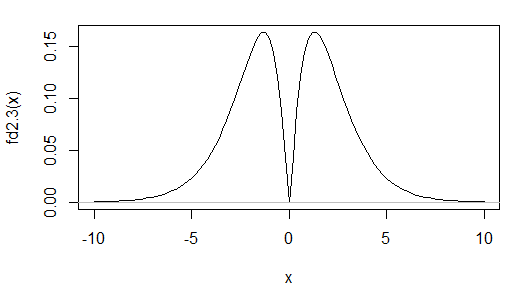

В итоге более правильный результат с точки зрения статистики нам дал тест шапира вилка, который мы ещё и привели к большей точности, засчёт нахождения характеристик генеральной выборки.

# Задание 2

## Используем t интервал

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)
  
sc.t.interval(alpha=0.90, df=len(gfg_data)-1,
              loc=np.mean(gfg_data),
              scale=sc.sem(gfg_data))

(-13.63591835963038, 11.197982790224998)

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)
  
sc.t.interval(alpha=0.95, df=len(gfg_data)-1,
              loc=np.mean(gfg_data),
              scale=sc.sem(gfg_data))

(-22.124746542891515, 13.068380987045822)

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)
  
sc.t.interval(alpha=0.99, df=len(gfg_data)-1,
              loc=np.mean(gfg_data),
              scale=sc.sem(gfg_data))

(-15.816106399403548, 31.53280283539056)

## Используем метод нормального распределения

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

sc.norm.interval(alpha=0.99,
                 loc=mu,
                 scale=sigma)

(-1.2231943634254385, 5.9716660906725325)

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

sc.norm.interval(alpha=0.95,
                 loc=mu,
                 scale=sigma)

(-0.3630703981684644, 5.111542125415559)

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

sc.norm.interval(alpha=0.90,
                 loc=mu,
                 scale=sigma)

(0.07701603290193049, 4.671455694345163)

$$
\mathbb{P}\left( \bar{X} - \frac{c_{1-\alpha/2}\sigma}{\sqrt{n}} < \mu < \bar{X} + \frac{c_{1-\alpha/2}\sigma}{\sqrt{n}} \right) = 1-\alpha,
$$

In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

CI_Theoretical = [np.mean(gfg_data) - sc.norm.ppf(1-0.1/2)*sigma/np.sqrt(n), np.mean(gfg_data) + sc.norm.ppf(1-0.1/2)*sigma/np.sqrt(n)]
print("Теоретический доверительный интервал равен", CI_Theoretical)

Теоретический доверительный интервал равен [15.319728498760666, 15.644604442796558]


In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

CI_Theoretical = [np.mean(gfg_data) - sc.norm.ppf(1-alpha/2)*sigma/np.sqrt(n), np.mean(gfg_data) + sc.norm.ppf(1-alpha/2)*sigma/np.sqrt(n)]
print("Теоретический доверительный интервал равен", CI_Theoretical)

Теоретический доверительный интервал равен [-5.427622970307636, -5.04050940632813]


In [ ]:
gfg_data = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

CI_Theoretical = [np.mean(gfg_data) - sc.norm.ppf(1-0.01/2)*sigma/np.sqrt(n), np.mean(gfg_data) + sc.norm.ppf(1-0.01/2)*sigma/np.sqrt(n)]
print("Теоретический доверительный интервал равен", CI_Theoretical)

Теоретический доверительный интервал равен [0.0855743208112511, 0.5943277824896109]


## Используем метод bootstrap, о котором говорилось на занятии

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


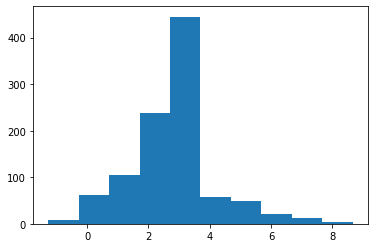


90.0 confidence interval 0.4653313615136144 and 5.324277338814124


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

x = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

n_iterations = 1000 
n_size = int(len(x))
  

medians = list()
for i in range(n_iterations):
   s = resample(x, n_samples=n_size);
   m = np.median(s);
   medians.append(m)
  

plt.hist(medians)
plt.show()
  

alpha = 0.90
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

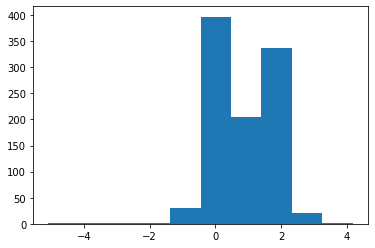


95.0 confidence interval -0.5307507035482102 and 2.293669131592115


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

x = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

n_iterations = 1000 
n_size = int(len(x))
  

medians = list()
for i in range(n_iterations):
   s = resample(x, n_samples=n_size);
   m = np.median(s);
   medians.append(m)
  

plt.hist(medians)
plt.show()
  

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

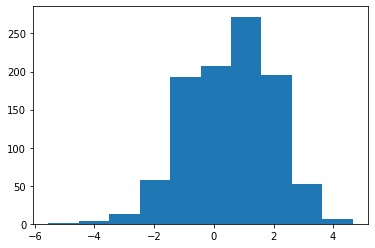


99.0 confidence interval -3.4248676692473743 and 3.677108039660328


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

x = sc.gennorm.rvs(0.35757330208639526, loc=mu, scale=sigma, size=n)

n_iterations = 1000 
n_size = int(len(x))
  

medians = list()
for i in range(n_iterations):
   s = resample(x, n_samples=n_size);
   m = np.median(s);
   medians.append(m)
  

plt.hist(medians)
plt.show()
  

alpha = 0.99
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)
  
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

# Вывод

С учётом того, что мы используем распределение сильно отличающееся от наших категориальных данных, самплирование вероятно плохо описало генеральную совокупность.\
То есть оценив эти значения, мы не можем хотя бы с какой-то уверенностью сказать, что данные, которые будут приходить в будущем имеют такие параметры